# Montecarlo aproximated function



In [19]:
%load_ext autoreload

%autoreload 2

In [20]:
import sys
sys.path.append('../')  # Enable importing from `src` folder

In [21]:
%matplotlib inline
from collections import defaultdict
from typing import List

import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

import gym

import src.agents as agents
import src.episode as episode
import src.environment as environment
import src.aux_plots as aux_plots

In [22]:
def print_result(i, scores, total_reward, score):
    if i % 10 == 0:
        print(f"Run [{i:4}] - Total reward: {total_reward:7.2f} Mean scores: {sum(scores) / len(scores):.2f} Means Scores[:-10]: {sum(scores[-10:]) / len(scores[-10:]):5.2f} Score: {score:2} ")

In [23]:
RAM_mask = [
      14  # Chicken Y
    , 16  # Chicken Lane Collide
    , 108, 109, 110, 111, 112, 113, 114, 115, 116, 117  # Car X Coords
]

In [24]:
def reduce_state(ob):
    # Doesn't matter where we were hit
    ob[16] = 1 if ob[16] != 255 else 0

    # Reduce chicken y-position
    ob[14] = ob[14] // 3

    for b in range(108, 118):
        # The chicken is in the x-posistion ~49
        if ob[b] < 20 or ob[b] > 80:
            # We don't need to represent cars far from the chicken
            ob[b] = 0
        else:
            # Reduce the cars x-positions sample space
            ob[b] = ob[b] // 3

    return ob

# Reward Policy

In [25]:
def reward_policy(reward, ob, action):
    if reward == 1:
        reward = reward_policy.REWARD_IF_CROSS
    elif ob[16] == 1:  # Collision!
        reward = reward_policy.REWARD_IF_COLISION
    elif action != 1:  # Don't incentivate staying still
        reward = reward_policy.REWARD_IF_STILL

    return reward

# Hyper Parameters

In [26]:
GAMMA = 0.99
AVAILABLE_ACTIONS = 2
N0 = 2.5

reward_policy.REWARD_IF_CROSS = 50
reward_policy.REWARD_IF_COLISION = -1
reward_policy.REWARD_IF_STILL = -0.1

# MonteCarlo

In [ ]:
env, initial_state = environment.get_env()

In [ ]:
agent = agents.MonteCarloControl(gamma=GAMMA, available_actions=AVAILABLE_ACTIONS, N0=N0)

In [ ]:
def MonteCarloES(RAM_mask: List[int], render: bool=False):
    epi = episode.generate_episode(env, reduce_state=reduce_state, reward_policy=reward_policy, agent=agent, RAM_mask=RAM_mask, render=render)
    return agent.update_policy(epi)

In [ ]:
episode.generate_episode(env, reduce_state=reduce_state, reward_policy=reward_policy, agent=agent, RAM_mask=RAM_mask, render=False)

In [ ]:
import pickle

In [ ]:
def saveHistory(config,scores,total_rewards):
    base="history/"
    with open(base+"scores_"+config+".pickle", 'wb') as handle:
        pickle.dump(scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    with open(base+"total_rewards_"+config+".pickle", 'wb') as handle:
        pickle.dump(total_rewards, handle, protocol=pickle.HIGHEST_PROTOCOL)    
    print("Scores and Total rewards for "+config+" saved")
def loadHistory(fileDir):
    with open(fileDir, 'rb') as handle:
        data = pickle.load(handle)
        return data

In [ ]:
%%time
MonteCarloES(RAM_mask=RAM_mask, render=False)

In [ ]:
scores = []
total_rewards = []

In [15]:
%%time

n_runs = 2500

for i in range(n_runs):
    render = i % 201 == 200

    score, total_reward = MonteCarloES(RAM_mask=RAM_mask, render=render)

    scores.append(score)
    total_rewards.append(total_reward)

    print_result(i, scores, total_reward, score)

Run [   0] - Total reward:  464.60 Mean scores: 13.00 Means Scores[:-10]: 13.00 Score: 13 
Run [  10] - Total reward:  443.10 Mean scores: 11.91 Means Scores[:-10]: 11.80 Score: 13 
Run [  20] - Total reward:  450.00 Mean scores: 11.95 Means Scores[:-10]: 12.00 Score: 13 
Run [  30] - Total reward:  459.10 Mean scores: 12.06 Means Scores[:-10]: 12.30 Score: 13 
Run [  40] - Total reward:  464.70 Mean scores: 11.95 Means Scores[:-10]: 11.60 Score: 13 
Run [  50] - Total reward:  457.90 Mean scores: 12.00 Means Scores[:-10]: 12.20 Score: 13 
Run [  60] - Total reward:  400.60 Mean scores: 12.00 Means Scores[:-10]: 12.00 Score: 12 
Run [  70] - Total reward:  559.50 Mean scores: 12.06 Means Scores[:-10]: 12.40 Score: 15 
Run [  80] - Total reward:  285.40 Mean scores: 12.00 Means Scores[:-10]: 11.60 Score: 10 
Run [  90] - Total reward:  294.50 Mean scores: 12.01 Means Scores[:-10]: 12.10 Score: 10 
Run [ 100] - Total reward:  407.00 Mean scores: 12.08 Means Scores[:-10]: 12.70 Score: 12 

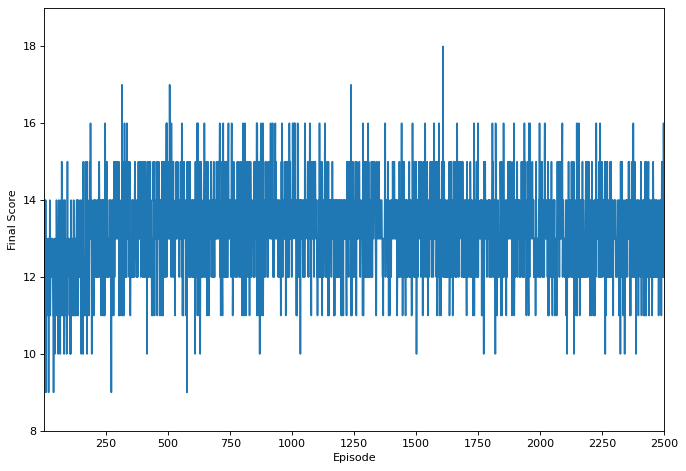

In [21]:
aux_plots.plot_scores(scores)

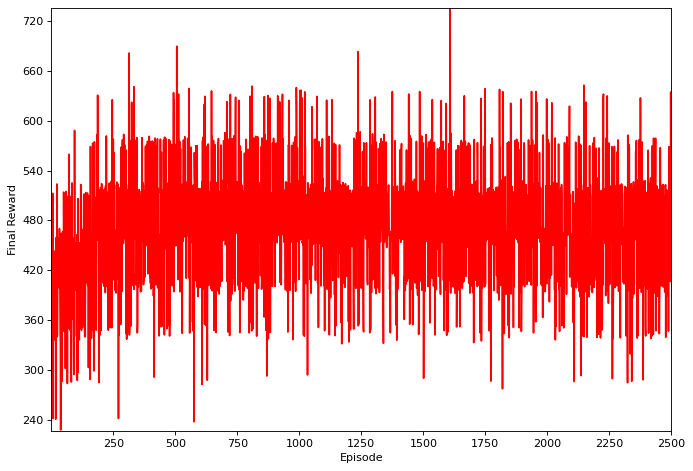

In [22]:
aux_plots.plot_rewards(total_rewards)

In [28]:
saveHistory("Episode2500",scores,total_rewards)

Scores and Total rewards for Episode2500 saved


# MonteCarlo Approximation

In [27]:
env, initial_state = environment.get_env()

In [28]:
agent = agents.MonteCarloAprox(gamma=GAMMA, available_actions=AVAILABLE_ACTIONS, N0=N0)

In [29]:
scores = []
total_rewards = []

In [30]:
def MonteCarloAprox(RAM_mask: List[int], render: bool=False):
    epi = episode.generate_episode(env, reduce_state=reduce_state, reward_policy=reward_policy, agent=agent, RAM_mask=RAM_mask, render=render)
    return agent.update_policy(epi)

In [31]:
from tqdm import tqdm

In [37]:
%%time

n_runs = 1

for i in tqdm(range(n_runs)):
    render = i % 201 == 200
    score, total_reward = MonteCarloAprox(RAM_mask=RAM_mask, render=render)
    scores.append(score)
    total_rewards.append(total_reward)
    print_result(i, scores, total_reward, score)

  0%|          | 0/1 [00:00<?, ?it/s]

S0: 
[2 0 0 0 0 0 0 0 0 0 0 0]
Length S0: 
12
Type S0: 
<class 'numpy.ndarray'>
S1: 
[2 0 0 0 0 0 0 0 0 0 0 0]
Length S1: 
12
Type S1: 
<class 'numpy.ndarray'>
S2: 
[2 0 0 0 0 0 0 0 0 0 0 0]
Length S2: 
12
Type S2: 
<class 'numpy.ndarray'>
S3: 
[2 0 0 0 0 0 0 0 0 0 0 0]
Length S3: 
12
Type S3: 
<class 'numpy.ndarray'>
S4: 
[2 0 0 0 0 0 0 0 0 0 0 0]
Length S4: 
12
Type S4: 
<class 'numpy.ndarray'>
S5: 
[2 0 0 0 0 0 0 0 0 0 0 0]
Length S5: 
12
Type S5: 
<class 'numpy.ndarray'>
S6: 
[2 0 0 0 0 0 0 0 0 0 0 0]
Length S6: 
12
Type S6: 
<class 'numpy.ndarray'>
S7: 
[2 0 0 0 0 0 6 0 0 0 0 0]
Length S7: 
12
Type S7: 
<class 'numpy.ndarray'>
S8: 
[2 0 0 0 0 0 7 0 0 0 0 0]
Length S8: 
12
Type S8: 
<class 'numpy.ndarray'>
S9: 
[2 0 0 0 0 0 8 0 0 0 0 0]
Length S9: 
12
Type S9: 
<class 'numpy.ndarray'>
S10: 
[2 0 0 0 0 0 9 0 0 0 0 0]
Length S10: 
12
Type S10: 
<class 'numpy.ndarray'>
S11: 
[ 3  0  0  0  0  0 10  0  0  0  0  0]
Length S11: 
12
Type S11: 
<class 'numpy.ndarray'>
S12: 
[ 3  0  0  0  0 

S189: 
[18  0  0  0  9  0 26 26 13  0  6 16]
Length S189: 
12
Type S189: 
<class 'numpy.ndarray'>
S190: 
[18  0  0  0  9  0  0 25 12  0  0 15]
Length S190: 
12
Type S190: 
<class 'numpy.ndarray'>
S191: 
[18  0  0  0  9  0  0 24 12  0  0 15]
Length S191: 
12
Type S191: 
<class 'numpy.ndarray'>
S192: 
[18  0  0  0 10  0  0 22 11  0  0 15]
Length S192: 
12
Type S192: 
<class 'numpy.ndarray'>
S193: 
[18  0  0  0 10  0  0 21 10  0  0 14]
Length S193: 
12
Type S193: 
<class 'numpy.ndarray'>
S194: 
[18  0  0  0 11  0  0 20 10  0  0 14]
Length S194: 
12
Type S194: 
<class 'numpy.ndarray'>
S195: 
[18  0  0  0 11  0  0 19  9  0  0 14]
Length S195: 
12
Type S195: 
<class 'numpy.ndarray'>
S196: 
[18  0  0  0 11  0  0 18  9  0  0 14]
Length S196: 
12
Type S196: 
<class 'numpy.ndarray'>
S197: 
[18  0  0  0 12  0  0 17  8  0  0 14]
Length S197: 
12
Type S197: 
<class 'numpy.ndarray'>
S198: 
[18  0  0  0 12  0  0 16  8  0  0 13]
Length S198: 
12
Type S198: 
<class 'numpy.ndarray'>
S199: 
[18  0  0  0 

[ 2  0 18  0 12 18  0 16  0  0 17  0]
Length S357: 
12
Type S357: 
<class 'numpy.ndarray'>
S358: 
[ 2  0 18  0 12 19  0 15  0  0 17  0]
Length S358: 
12
Type S358: 
<class 'numpy.ndarray'>
S359: 
[ 2  0 18  0 13 19  0 14  0  0 16  0]
Length S359: 
12
Type S359: 
<class 'numpy.ndarray'>
S360: 
[ 2  0 18  0 13 20  0 13  0  0 16  0]
Length S360: 
12
Type S360: 
<class 'numpy.ndarray'>
S361: 
[ 2  0 19  0 13 20  0 12  0  0 16  0]
Length S361: 
12
Type S361: 
<class 'numpy.ndarray'>
S362: 
[ 2  0 19  0 14 21  0 11  0  0 16  0]
Length S362: 
12
Type S362: 
<class 'numpy.ndarray'>
S363: 
[ 2  0 19  0 14 21  0 10  0  0 16  0]
Length S363: 
12
Type S363: 
<class 'numpy.ndarray'>
S364: 
[ 2  0 19  0 14 21  0  9  0  0 15  0]
Length S364: 
12
Type S364: 
<class 'numpy.ndarray'>
S365: 
[ 2  0 19  0 15 22  0  8  0  0 15  0]
Length S365: 
12
Type S365: 
<class 'numpy.ndarray'>
S366: 
[ 2  0 20  0 15 23  0  7  0  0 15  0]
Length S366: 
12
Type S366: 
<class 'numpy.ndarray'>
S367: 
[ 2  0 20  0 15 23  

12
Type S550: 
<class 'numpy.ndarray'>
S551: 
[17  0  0  0 23  8 15  0  0  0 22  0]
Length S551: 
12
Type S551: 
<class 'numpy.ndarray'>
S552: 
[18  0  0  0 23  8 17  0  0  0 22  0]
Length S552: 
12
Type S552: 
<class 'numpy.ndarray'>
S553: 
[19  0  0  0 24  9 18  0  0  0 22  0]
Length S553: 
12
Type S553: 
<class 'numpy.ndarray'>
S554: 
[20  0  0  0 24  9 19  0  0  0 21  0]
Length S554: 
12
Type S554: 
<class 'numpy.ndarray'>
S555: 
[20  0  0  0 24 10 20  0  0  0 21  0]
Length S555: 
12
Type S555: 
<class 'numpy.ndarray'>
S556: 
[21  0  0  0 25 10 21  0  0  0 21  0]
Length S556: 
12
Type S556: 
<class 'numpy.ndarray'>
S557: 
[22  0  0  0 25 11 22  0  0  0 21  0]
Length S557: 
12
Type S557: 
<class 'numpy.ndarray'>
S558: 
[22  0  0  0 25 11 23  0  0  0 20  0]
Length S558: 
12
Type S558: 
<class 'numpy.ndarray'>
S559: 
[22  0  0  0 25 12 23  0  0  0 20  0]
Length S559: 
12
Type S559: 
<class 'numpy.ndarray'>
S560: 
[22  0  0  0 26 12 25  0  0  0 20  0]
Length S560: 
12
Type S560: 
<clas

12
Type S746: 
<class 'numpy.ndarray'>
S747: 
[26  0  0 25  0  0  0  6  0 20  0 12]
Length S747: 
12
Type S747: 
<class 'numpy.ndarray'>
S748: 
[26  0  0 25  0  0  0  0  0 19  0 11]
Length S748: 
12
Type S748: 
<class 'numpy.ndarray'>
S749: 
[27  0  0 25  0  0  0  0  0 19  0 11]
Length S749: 
12
Type S749: 
<class 'numpy.ndarray'>
S750: 
[29  0  0 26  0  0  0  0  0 18  0 11]
Length S750: 
12
Type S750: 
<class 'numpy.ndarray'>
S751: 
[29  0  0 26  0  0  0  0  0 18  0 11]
Length S751: 
12
Type S751: 
<class 'numpy.ndarray'>
S752: 
[30  0  0 26  0  0  0  0  0 18  0 10]
Length S752: 
12
Type S752: 
<class 'numpy.ndarray'>
S753: 
[31  0  0 26  0  0  0  0  0 17 26 10]
Length S753: 
12
Type S753: 
<class 'numpy.ndarray'>
S754: 
[32  0  0  0  0  0  0  0  0 17 26 10]
Length S754: 
12
Type S754: 
<class 'numpy.ndarray'>
S755: 
[32  0  0  0  0  0  0  0  0 17 26 10]
Length S755: 
12
Type S755: 
<class 'numpy.ndarray'>
S756: 
[33  0  0  0  0  0  0  0  0 16 25 10]
Length S756: 
12
Type S756: 
<clas

S958: 
[17  0  0 24  0  0  0 11  0  0  0 23]
Length S958: 
12
Type S958: 
<class 'numpy.ndarray'>
S959: 
[17  0  0 24  0  0  0 10  0  0  0 23]
Length S959: 
12
Type S959: 
<class 'numpy.ndarray'>
S960: 
[17  0  0 24  0  0  0  9  0  0  0 23]
Length S960: 
12
Type S960: 
<class 'numpy.ndarray'>
S961: 
[17  0  0 24  0  0  0  8  0  0  0 23]
Length S961: 
12
Type S961: 
<class 'numpy.ndarray'>
S962: 
[18  0  0 24  0  0  0  7  0  0  0 22]
Length S962: 
12
Type S962: 
<class 'numpy.ndarray'>
S963: 
[18  0  0 25  0  0  0  0  0  0  0 22]
Length S963: 
12
Type S963: 
<class 'numpy.ndarray'>
S964: 
[18  0  0 25  0  0  0  0  0  0  0 22]
Length S964: 
12
Type S964: 
<class 'numpy.ndarray'>
S965: 
[18  0  0 25  0  0  0  0  0  0  0 22]
Length S965: 
12
Type S965: 
<class 'numpy.ndarray'>
S966: 
[19  0  0 25  0  0  0  0  0  0  0 22]
Length S966: 
12
Type S966: 
<class 'numpy.ndarray'>
S967: 
[20  0  0 25  0  0  0  0  0  0  0 22]
Length S967: 
12
Type S967: 
<class 'numpy.ndarray'>
S968: 
[20  0  0 26 

S1198: 
[34  0 23  0 20  0  7  0  0  0 24  0]
Length S1198: 
12
Type S1198: 
<class 'numpy.ndarray'>
S1199: 
[35  0 23  0 20  0  8  0  0  0 24  0]
Length S1199: 
12
Type S1199: 
<class 'numpy.ndarray'>
S1200: 
[35  0 23  0 20  0  8  0  0  0 24  0]
Length S1200: 
12
Type S1200: 
<class 'numpy.ndarray'>
S1201: 
[36  0 23  0 21  0  9  0  0  0 24  0]
Length S1201: 
12
Type S1201: 
<class 'numpy.ndarray'>
S1202: 
[37  0 23  0 21  0 10  0  0  0 24  0]
Length S1202: 
12
Type S1202: 
<class 'numpy.ndarray'>
S1203: 
[38  0 23  0 21  0 11  0  0  0 23  0]
Length S1203: 
12
Type S1203: 
<class 'numpy.ndarray'>
S1204: 
[39  0 24  0 22  0 12  0  0  0 23  0]
Length S1204: 
12
Type S1204: 
<class 'numpy.ndarray'>
S1205: 
[41  0 24  0 22  7 14  0  0  0 23  0]
Length S1205: 
12
Type S1205: 
<class 'numpy.ndarray'>
S1206: 
[41  0 24  0 22  7 14  0  0  0 22  0]
Length S1206: 
12
Type S1206: 
<class 'numpy.ndarray'>
S1207: 
[42  0 24  0 23  8 15  0  0  0 22  0]
Length S1207: 
12
Type S1207: 
<class 'numpy.

S1431: 
[28  0 15  0  0 12 25  0  0  9 20  0]
Length S1431: 
12
Type S1431: 
<class 'numpy.ndarray'>
S1432: 
[28  0 16  0  0 13 25  0  0  9 20  0]
Length S1432: 
12
Type S1432: 
<class 'numpy.ndarray'>
S1433: 
[29  0 16  0  0 13  0 26  0  8 19  0]
Length S1433: 
12
Type S1433: 
<class 'numpy.ndarray'>
S1434: 
[30  0 16  0  0 14  0 25  0  8 19  0]
Length S1434: 
12
Type S1434: 
<class 'numpy.ndarray'>
S1435: 
[31  0 16  0  0 14  0 24  0  8 19  0]
Length S1435: 
12
Type S1435: 
<class 'numpy.ndarray'>
S1436: 
[31  0 16  0  0 15  0 23  0  7 19  0]
Length S1436: 
12
Type S1436: 
<class 'numpy.ndarray'>
S1437: 
[33  0 17  0  0 15  0 22  0  7 18  0]
Length S1437: 
12
Type S1437: 
<class 'numpy.ndarray'>
S1438: 
[33  0 17  0  0 16  0 21  0  7 18  0]
Length S1438: 
12
Type S1438: 
<class 'numpy.ndarray'>
S1439: 
[33  0 17  0  0 16  0 20  0  6 18  0]
Length S1439: 
12
Type S1439: 
<class 'numpy.ndarray'>
S1440: 
[33  0 17  0  0 17  0 18  0  0 18  0]
Length S1440: 
12
Type S1440: 
<class 'numpy.

S1674: 
[ 9  0 11  0 18  0  0  0 25  0 12  0]
Length S1674: 
12
Type S1674: 
<class 'numpy.ndarray'>
S1675: 
[ 8  0 11  0 19  0  0  0 24  0 12  0]
Length S1675: 
12
Type S1675: 
<class 'numpy.ndarray'>
S1676: 
[ 7  0 11  0 19  0  0  0 24  0 12  0]
Length S1676: 
12
Type S1676: 
<class 'numpy.ndarray'>
S1677: 
[ 7  0 12  0 19  0  0  0 23  0 11  0]
Length S1677: 
12
Type S1677: 
<class 'numpy.ndarray'>
S1678: 
[ 7  0 12  0 20  0  6  0 23  0 11  0]
Length S1678: 
12
Type S1678: 
<class 'numpy.ndarray'>
S1679: 
[ 7  0 12  0 20  0  7  0 22  0 11  0]
Length S1679: 
12
Type S1679: 
<class 'numpy.ndarray'>
S1680: 
[ 7  0 12  0 20  0  8  0 22  0 11  0]
Length S1680: 
12
Type S1680: 
<class 'numpy.ndarray'>
S1681: 
[ 7  0 12  0 20  0  8  0 22  0 11  0]
Length S1681: 
12
Type S1681: 
<class 'numpy.ndarray'>
S1682: 
[ 7  0 12  0 21  0  9  0 21  0 10  0]
Length S1682: 
12
Type S1682: 
<class 'numpy.ndarray'>
S1683: 
[ 7  0 13  0 21  0 10  0 21  0 10  0]
Length S1683: 
12
Type S1683: 
<class 'numpy.

S1950: 
[35  0 12  0  0  0  9  0  0  0  0  0]
Length S1950: 
12
Type S1950: 
<class 'numpy.ndarray'>
S1951: 
[35  0 13  0  0  0 10  0  0  0  0  0]
Length S1951: 
12
Type S1951: 
<class 'numpy.ndarray'>
S1952: 
[35  0 13  0  0  0 11  0  0  0  0  0]
Length S1952: 
12
Type S1952: 
<class 'numpy.ndarray'>
S1953: 
[36  0 13  0  0  0 12  0  0  0  0  0]
Length S1953: 
12
Type S1953: 
<class 'numpy.ndarray'>
S1954: 
[36  0 13  0  0  7 13  0  0  0  0  0]
Length S1954: 
12
Type S1954: 
<class 'numpy.ndarray'>
S1955: 
[37  0 13  0  0  7 14  0  0  0  0  0]
Length S1955: 
12
Type S1955: 
<class 'numpy.ndarray'>
S1956: 
[38  0 14  0  0  8 15  0  0  0  0  0]
Length S1956: 
12
Type S1956: 
<class 'numpy.ndarray'>
S1957: 
[39  0 14  0  0  8 16  0  0  0  0  0]
Length S1957: 
12
Type S1957: 
<class 'numpy.ndarray'>
S1958: 
[39  0 14  0  0  9 18  0  0  0  0  0]
Length S1958: 
12
Type S1958: 
<class 'numpy.ndarray'>
S1959: 
[39  0 14  0  0  9 18  0  0  0  0  0]
Length S1959: 
12
Type S1959: 
<class 'numpy.

S2217: 
[28  0 13 16  0  0 12  0 20 13  0  0]
Length S2217: 
12
Type S2217: 
<class 'numpy.ndarray'>
S2218: 
[28  1 13 17  0  0 14  0 19 13  0  0]
Length S2218: 
12
Type S2218: 
<class 'numpy.ndarray'>
S2219: 
[27  1 13 17  0  0 15  0 19 12  0  0]
Length S2219: 
12
Type S2219: 
<class 'numpy.ndarray'>
S2220: 
[26  1 14 17  0  0 16  0 18 12  0  0]
Length S2220: 
12
Type S2220: 
<class 'numpy.ndarray'>
S2221: 
[25  0 14 17  0  0 17  0 18 12  0  0]
Length S2221: 
12
Type S2221: 
<class 'numpy.ndarray'>
S2222: 
[25  0 14 18  0  0 17  0 17 11  0  0]
Length S2222: 
12
Type S2222: 
<class 'numpy.ndarray'>
S2223: 
[23  0 14 18  0  0 19  0 17 11  0  0]
Length S2223: 
12
Type S2223: 
<class 'numpy.ndarray'>
S2224: 
[23  0 14 18  0  0 19  0 16 11  0  0]
Length S2224: 
12
Type S2224: 
<class 'numpy.ndarray'>
S2225: 
[22  0 15 18  0  0 20  0 16 10  0  0]
Length S2225: 
12
Type S2225: 
<class 'numpy.ndarray'>
S2226: 
[21  0 15 19  0  0 21  0 15 10  0  0]
Length S2226: 
12
Type S2226: 
<class 'numpy.

100%|██████████| 1/1 [00:05<00:00,  5.12s/it]


Length S2525: 
12
Type S2525: 
<class 'numpy.ndarray'>
S2526: 
[42  0 21  0  0 25  0  0  0 18 13  0]
Length S2526: 
12
Type S2526: 
<class 'numpy.ndarray'>
S2527: 
[41  0 21  0  0 26  0  0  0 18 13  0]
Length S2527: 
12
Type S2527: 
<class 'numpy.ndarray'>
S2528: 
[40  0 21  0  0 26  0  0 26 17 13  0]
Length S2528: 
12
Type S2528: 
<class 'numpy.ndarray'>
S2529: 
[39  0 21  0  0  0  0  0 26 17 13  0]
Length S2529: 
12
Type S2529: 
<class 'numpy.ndarray'>
S2530: 
[39  0 21  0  0  0  0  0 25 17 12  0]
Length S2530: 
12
Type S2530: 
<class 'numpy.ndarray'>
S2531: 
[39  0 22  0  0  0  0  0 25 16 12  0]
Length S2531: 
12
Type S2531: 
<class 'numpy.ndarray'>
S2532: 
[39  0 22  0  0  0  0  0 25 16 12  0]
Length S2532: 
12
Type S2532: 
<class 'numpy.ndarray'>
S2533: 
[39  0 22  0  0  0  0  0 24 16 12  0]
Length S2533: 
12
Type S2533: 
<class 'numpy.ndarray'>
S2534: 
[39  0 22  0  0  0  0  0 23 15 11  0]
Length S2534: 
12
Type S2534: 
<class 'numpy.ndarray'>
S2535: 
[39  0 22  0  0  0  0  0 23

In [ ]:
%%time
scores = []
total_rewards = []

n_runs = 1
render = False
for i in range(n_runs):
#     render = i % 200 == 0

    game_over = False
    state = env.reset()
    state = reduce_state(state)[RAM_mask].data.tobytes()  # Select useful bytes
    action = ql_agent_app.act(state)
    
    score = 0
    total_reward = 0

    while not game_over:
        if render:
            time.sleep(0.025)
            env.render()

        old_state = state
        ob, reward, game_over, _ = env.step(action)

        ob = reduce_state(ob)
        reward = reward_policy(reward, ob, action)

        total_reward += reward

        if reward == reward_policy.REWARD_IF_CROSS:
            score += 1

        state = ob[RAM_mask].data.tobytes()

        ql_agent_app.update_W(old_state, state, action, reward)

        action = ql_agent_app.act(state)  # Next action

    scores.append(score)
    total_rewards.append(total_reward)

    print_result(i, scores, total_reward, score)